In [8]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('./Dataset-Unicauca-Version2-87Atts.csv')
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [10]:
df.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

#Preprocessing

Removing unnecessary columns

L7protocol and protocol name are mapped with each other as protocol name is categorical and L7protocol is already in numerical we remove protocol feature.

All the features having constant value over the dataset are removed. Below is list of features:

Label,Bwd.Avg.Bulk.Rate,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Fwd.Avg.Bytes.Bulk,CWE.Flag.Count,Bwd.URG.Flags,Fwd.URG.Flags,Bwd.PSH.Flags,Label

In [11]:
df.drop(columns=['Bwd.Avg.Bulk.Rate','Bwd.Avg.Packets.Bulk','Bwd.Avg.Bytes.Bulk','Fwd.Avg.Packets.Bulk','Fwd.Avg.Bulk.Rate','Fwd.Avg.Bytes.Bulk','CWE.Flag.Count','Bwd.URG.Flags','Fwd.URG.Flags','Bwd.PSH.Flags','Label'], inplace=True)

In [12]:
df.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s',
       'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length',
       'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance',
      

Removing unwanted columns:

In [13]:
df.drop(columns=['ECE.Flag.Count','URG.Flag.Count','ACK.Flag.Count','PSH.Flag.Count','RST.Flag.Count','SYN.Flag.Count','FIN.Flag.Count','Fwd.PSH.Flags','Flow.ID'], inplace=True)

In [14]:
df.columns

Index(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.Header.Length', 'Bwd.Header.Length',
       'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length',
       'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std',
       'Packet.Length.Variance', 'Down.Up.Ratio', 'Average.Packet.S

In [15]:
null_counts = df.isnull().sum()
features_with_nulls = null_counts[null_counts > 0]

for feature, null_count in features_with_nulls.items():
    print("Feature '{feature}' has {null_count} null values.")

From above we can see that there are no null values in any feature in dataset.

In [16]:
df.shape

(3577296, 67)

<Axes: >

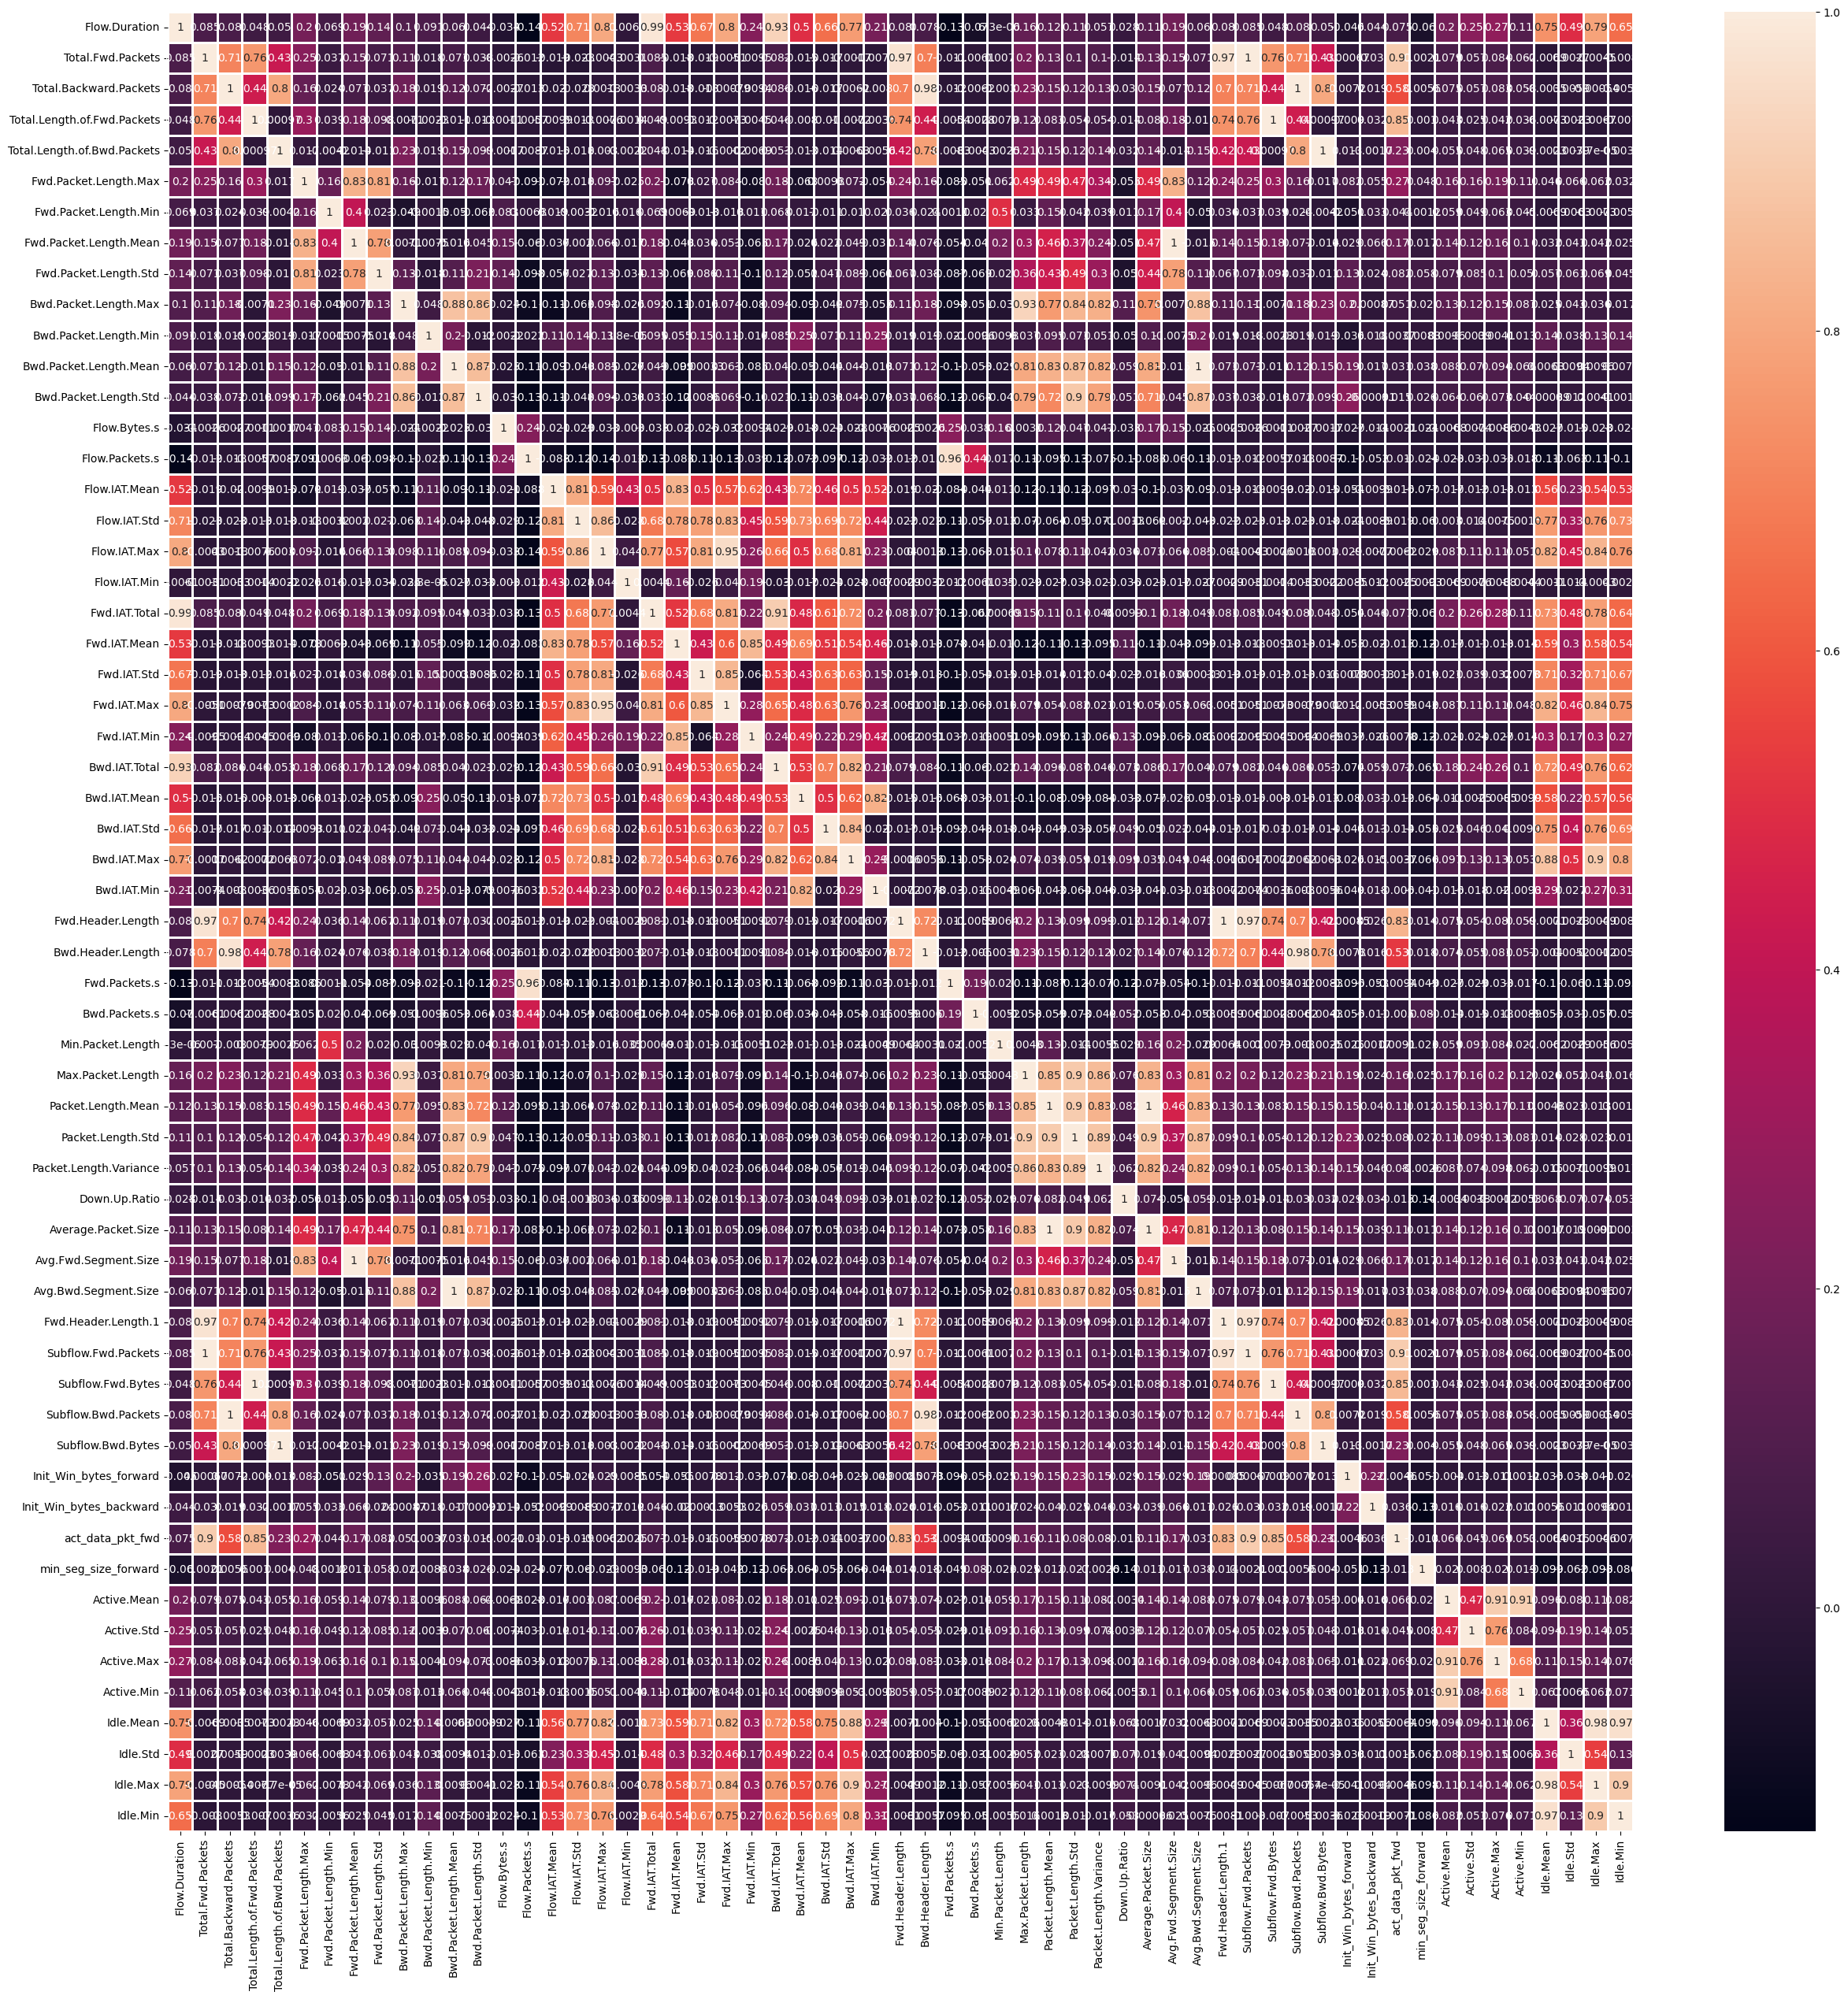

In [17]:
new_df = df[['Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.Header.Length', 'Bwd.Header.Length',
       'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length',
       'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std',
       'Packet.Length.Variance', 'Down.Up.Ratio', 'Average.Packet.Size',
       'Avg.Fwd.Segment.Size', 'Avg.Bwd.Segment.Size', 'Fwd.Header.Length.1',
       'Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes', 'Subflow.Bwd.Packets',
       'Subflow.Bwd.Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active.Mean', 'Active.Std', 'Active.Max', 'Active.Min', 'Idle.Mean',
       'Idle.Std', 'Idle.Max', 'Idle.Min']]
plt.figure(figsize=(30,30))
sns.heatmap(data=new_df.corr(), lw = 1,annot=True)

1) Total.Fwd.Packets is highly corelated with Total.Backward.Packets,Total.Length.Fwd.Packets,Fwd.Header.length.1,Subflow.Fwd.Packets,Subflow.Bwd.Packets,Bwd.Header.Length,act_data_pkt_fwd,Subflow.Fwd.Bytes,Fwd.Header.Length <br><br>
2) Flow.duration is highly corelated with  Flow.IAT.Mean, 'Flow.IAT.Std', 'Flow.IAT.Max','Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max','Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max','Idle.Mean', 'Idle.Max', 'Idle.Min,  'Idle.Std' <br><br>
3) 'Packet.Length.Mean' is highly corelated with 'Max.Packet.Length',, 'Packet.Length.Std', 'Packet.Length.Variance','Average.Packet.Size','Avg.Bwd.Segment.Size','Bwd.Packet.Length.Max','Bwd.Packet.Length.Mean','Bwd.Packet.Length.Std' <br>
4)Total .length.of.BWD.Packets is highly corelated with Subflow.Bwd.Bytes <br><br>
5) Active.mean is highly co related with  'Active.Std', 'Active.Max', 'Active.Min'. <br><br>
6) 'Flow.Packets.s' is highly co related with  'Fwd.Packets.s' <br><br>
 7) 'Min.Packet.Length' is highly corelated with 'Fwd.Packet.Length.Min' <br><br>
8) 'Fwd.Packet.Length.Mean' is highly corelated with 'Avg.Fwd.Segment.Size', 'Fwd.Packet.Length.Std','Fwd.Packet.Length.Max'

In [18]:
df.drop(columns=['Fwd.Header.Length.1','Subflow.Fwd.Packets','Subflow.Bwd.Packets','Bwd.Header.Length','act_data_pkt_fwd','Subflow.Fwd.Bytes','Fwd.Header.Length'], inplace=True)

In [19]:
df.drop(columns=['Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max','Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max','Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max','Idle.Mean',
        'Idle.Max', 'Idle.Min',  'Idle.Std'], inplace=True)

'Packet.Length.Mean' is highly corelated with 'Max.Packet.Length',, 'Packet.Length.Std', 'Packet.Length.Variance','Average.Packet.Size','Avg.Bwd.Segment.Size','Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std'

In [20]:
df.drop(columns=['Max.Packet.Length', 'Packet.Length.Std', 'Packet.Length.Variance','Average.Packet.Size','Avg.Bwd.Segment.Size','Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std'], inplace=True)

In [21]:
df.drop(columns=['Active.Std', 'Active.Max', 'Active.Min', 'Fwd.Packets.s','Avg.Fwd.Segment.Size', 'Fwd.Packet.Length.Std','Fwd.Packet.Length.Max','Fwd.Packet.Length.Min'], inplace=True)

In [22]:
df.drop(columns=[ 'Subflow.Bwd.Bytes'], inplace=True)

In [23]:
df.columns

Index(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Min', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Min', 'Fwd.IAT.Min', 'Bwd.IAT.Min', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Packet.Length.Mean', 'Down.Up.Ratio',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active.Mean', 'L7Protocol', 'ProtocolName'],
      dtype='object')

In [ ]:
print(df.dtypes)

Source.IP                       object
Source.Port                      int64
Destination.IP                  object
Destination.Port                 int64
Protocol                         int64
Timestamp                       object
Flow.Duration                    int64
Total.Fwd.Packets                int64
Total.Backward.Packets           int64
Total.Length.of.Fwd.Packets      int64
Total.Length.of.Bwd.Packets    float64
Fwd.Packet.Length.Mean         float64
Bwd.Packet.Length.Min            int64
Flow.Bytes.s                   float64
Flow.Packets.s                 float64
Flow.IAT.Min                     int64
Fwd.IAT.Min                    float64
Bwd.IAT.Min                    float64
Bwd.Packets.s                  float64
Min.Packet.Length                int64
Packet.Length.Mean             float64
Down.Up.Ratio                    int64
Init_Win_bytes_forward           int64
Init_Win_bytes_backward          int64
min_seg_size_forward             int64
Active.Mean              

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = ['Source.IP','Destination.IP']

# Perform label encoding for the specified columns
for column in columns_to_encode:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

In [24]:
df.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,...,Bwd.Packets.s,Min.Packet.Length,Packet.Length.Mean,Down.Up.Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active.Mean,L7Protocol,ProtocolName
0,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,...,1208.180480,6,1417.333333,2,256,490,20,0.0,131,HTTP_PROXY
1,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,...,0.000000,6,6.000000,0,490,-1,20,0.0,131,HTTP_PROXY
2,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,...,0.000000,0,252.750000,0,888,-1,32,0.0,7,HTTP
3,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,...,13824.884793,0,0.000000,3,888,490,32,0.0,7,HTTP
4,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,...,0.000000,6,267.500000,0,253,-1,20,0.0,131,HTTP_PROXY


#EDA

#### Boxplot

C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future versi

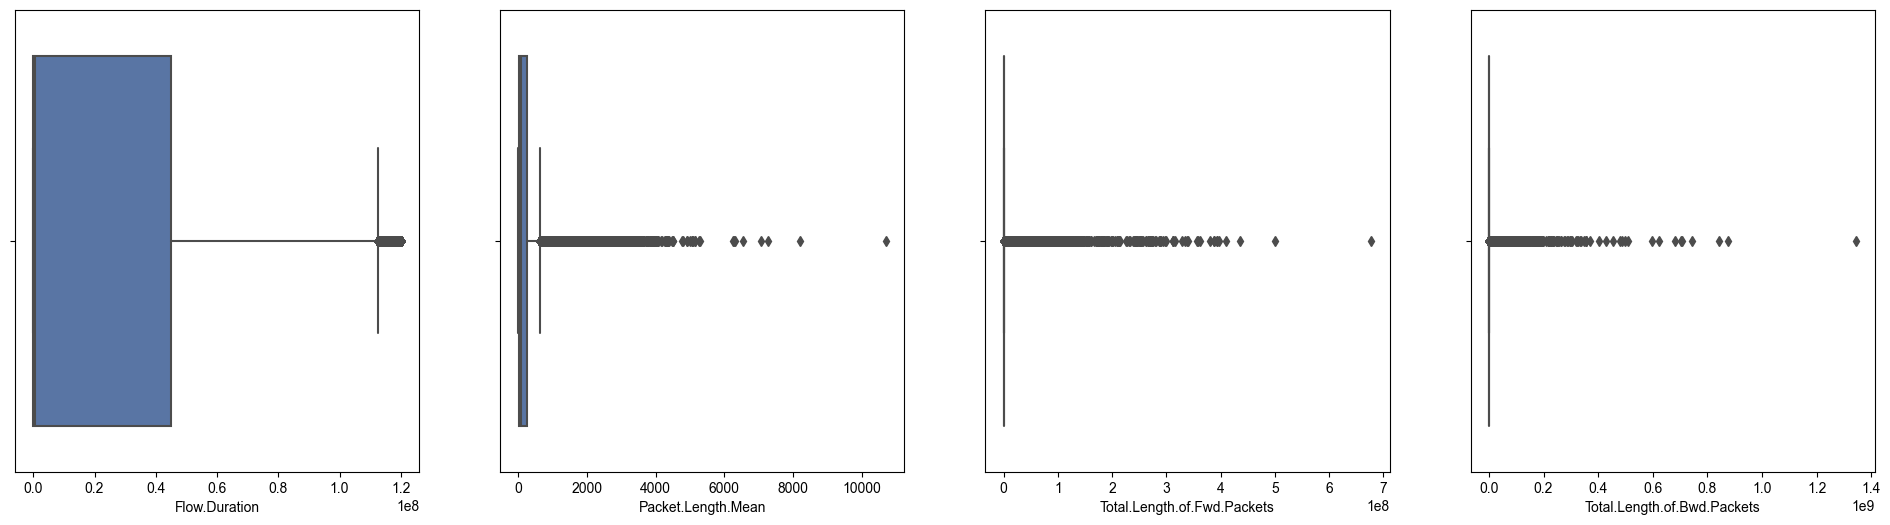

In [25]:
fig, ax = plt.subplots(1, 4, figsize=(24, 6))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Flow.Duration", "Packet.Length.Mean","Total.Length.of.Fwd.Packets","Total.Length.of.Bwd.Packets"]):
    sns.boxplot(x=df[col], ax=ax[axid])

C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\thesh\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


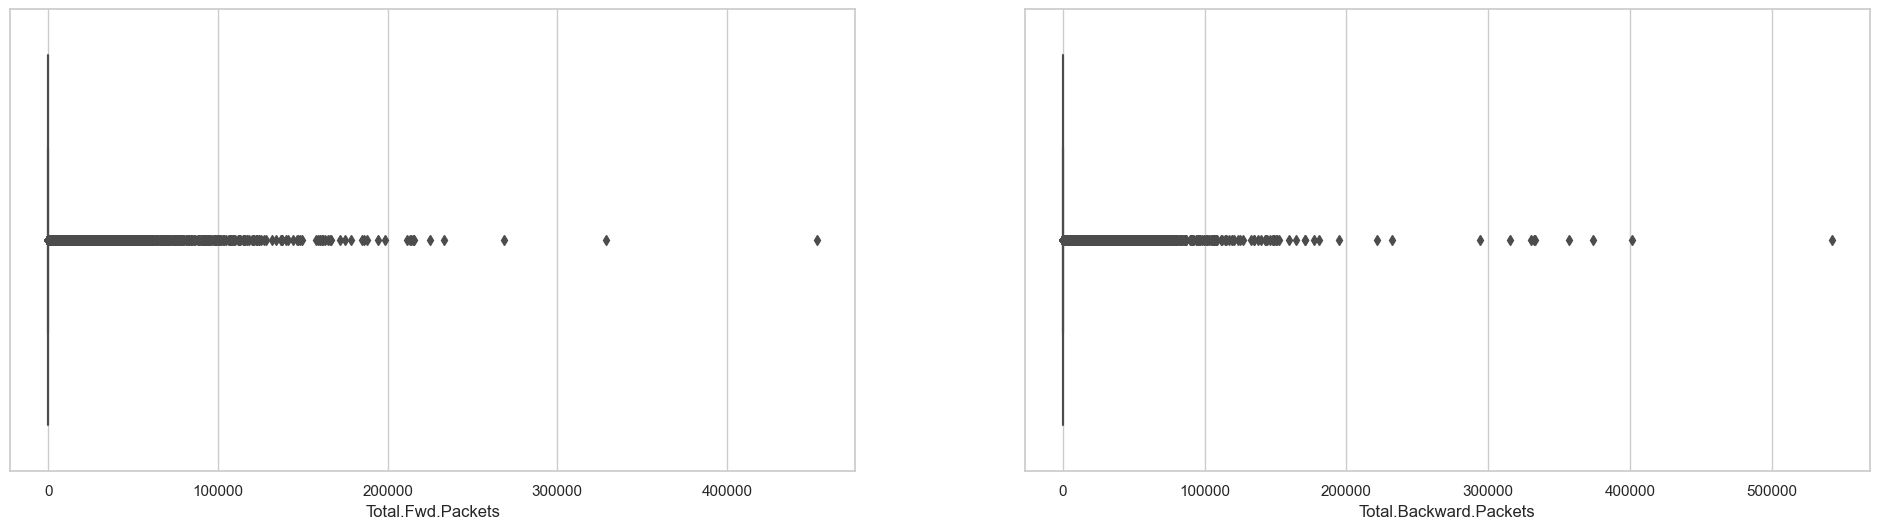

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["Total.Fwd.Packets", "Total.Backward.Packets"]):
    sns.boxplot(x=df[col], ax=ax[axid])

In [27]:
print(df.shape)

(3577296, 28)


In [28]:
print(df.dtypes)

Source.IP                       object
Source.Port                      int64
Destination.IP                  object
Destination.Port                 int64
Protocol                         int64
Timestamp                       object
Flow.Duration                    int64
Total.Fwd.Packets                int64
Total.Backward.Packets           int64
Total.Length.of.Fwd.Packets      int64
Total.Length.of.Bwd.Packets    float64
Fwd.Packet.Length.Mean         float64
Bwd.Packet.Length.Min            int64
Flow.Bytes.s                   float64
Flow.Packets.s                 float64
Flow.IAT.Min                     int64
Fwd.IAT.Min                    float64
Bwd.IAT.Min                    float64
Bwd.Packets.s                  float64
Min.Packet.Length                int64
Packet.Length.Mean             float64
Down.Up.Ratio                    int64
Init_Win_bytes_forward           int64
Init_Win_bytes_backward          int64
min_seg_size_forward             int64
Active.Mean              

In [29]:
df.columns

Index(['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Min', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Min', 'Fwd.IAT.Min', 'Bwd.IAT.Min', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Packet.Length.Mean', 'Down.Up.Ratio',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active.Mean', 'L7Protocol', 'ProtocolName'],
      dtype='object')

In [31]:
# Function to remove outliers using IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# List of columns for which you want to remove outliers
columns_to_check = [  'Source.Port', 'Destination.Port',
       'Protocol', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Min', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Min', 'Fwd.IAT.Min', 'Bwd.IAT.Min', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Packet.Length.Mean', 'Down.Up.Ratio',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active.Mean']  # Replace with your column names

# Remove outliers from the DataFrame
df_cleaned = remove_outliers(df, columns_to_check)

# Now, df_cleaned contains your DataFrame with outliers removed.
df_cleaned.head()
print(df_cleaned.shape)

(215608, 28)


In [32]:
df.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,...,Bwd.Packets.s,Min.Packet.Length,Packet.Length.Mean,Down.Up.Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active.Mean,L7Protocol,ProtocolName
0,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,...,1208.180480,6,1417.333333,2,256,490,20,0.0,131,HTTP_PROXY
1,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,...,0.000000,6,6.000000,0,490,-1,20,0.0,131,HTTP_PROXY
2,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,...,0.000000,0,252.750000,0,888,-1,32,0.0,7,HTTP
3,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,...,13824.884793,0,0.000000,3,888,490,32,0.0,7,HTTP
4,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,...,0.000000,6,267.500000,0,253,-1,20,0.0,131,HTTP_PROXY


###Piechart

Distribution of ProtocolName && Protocoltype

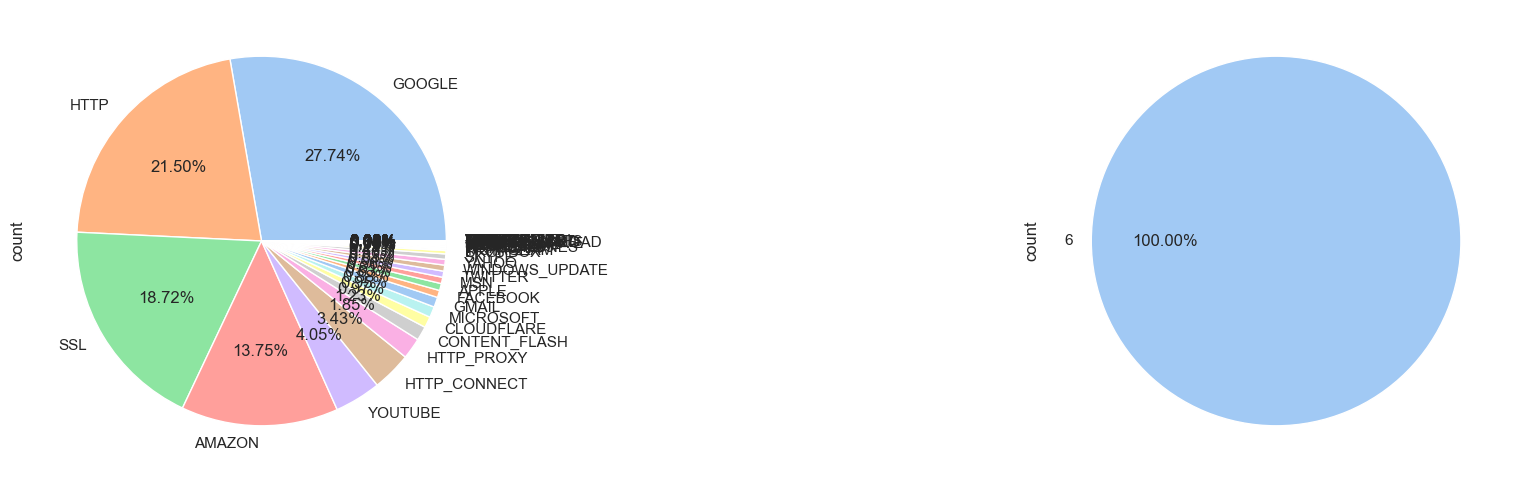

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

for axid, col in enumerate(["ProtocolName","Protocol"]):
    col_dist = df_cleaned[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[axid])

Distribution of L7 Protocol Names && Down/Up Ratio

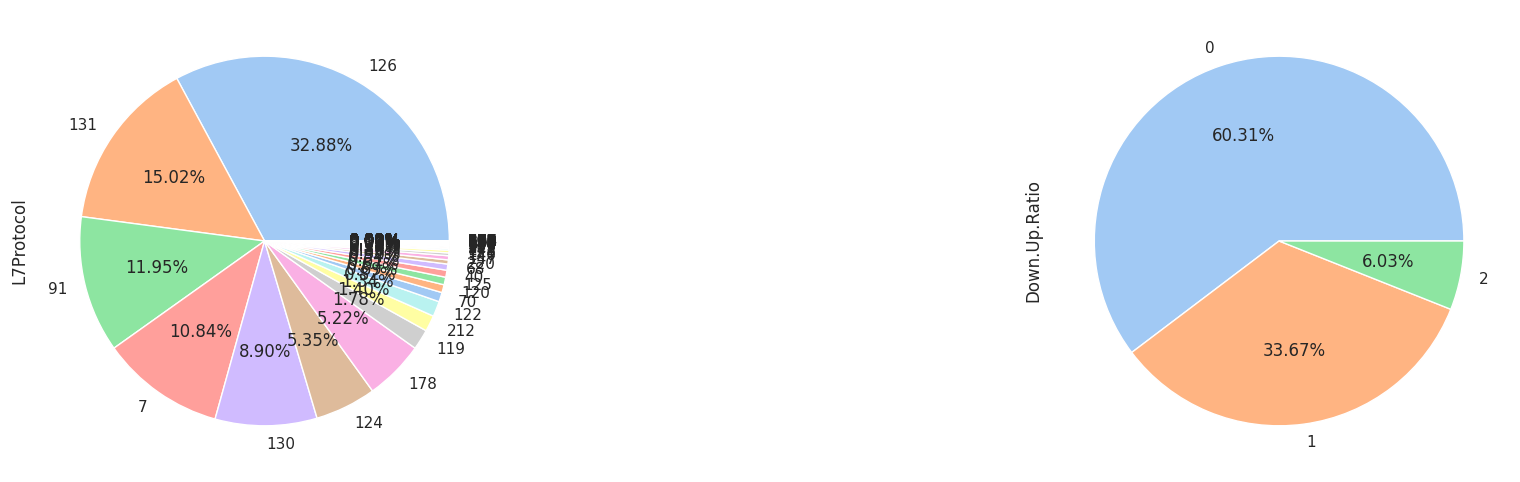

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(24, 6))

for axid, col in enumerate(["L7Protocol","Down.Up.Ratio"]):
    col_dist = df_cleaned[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    col_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[axid])

In [ ]:
df_cnt_h=df_cleaned['Flow.Duration'].value_counts()
df_cnt_h

451        129
448        127
463        124
460        123
455        116
          ... 
118134       1
197198       1
146074       1
96590        1
2458492      1
Name: Flow.Duration, Length: 604339, dtype: int64

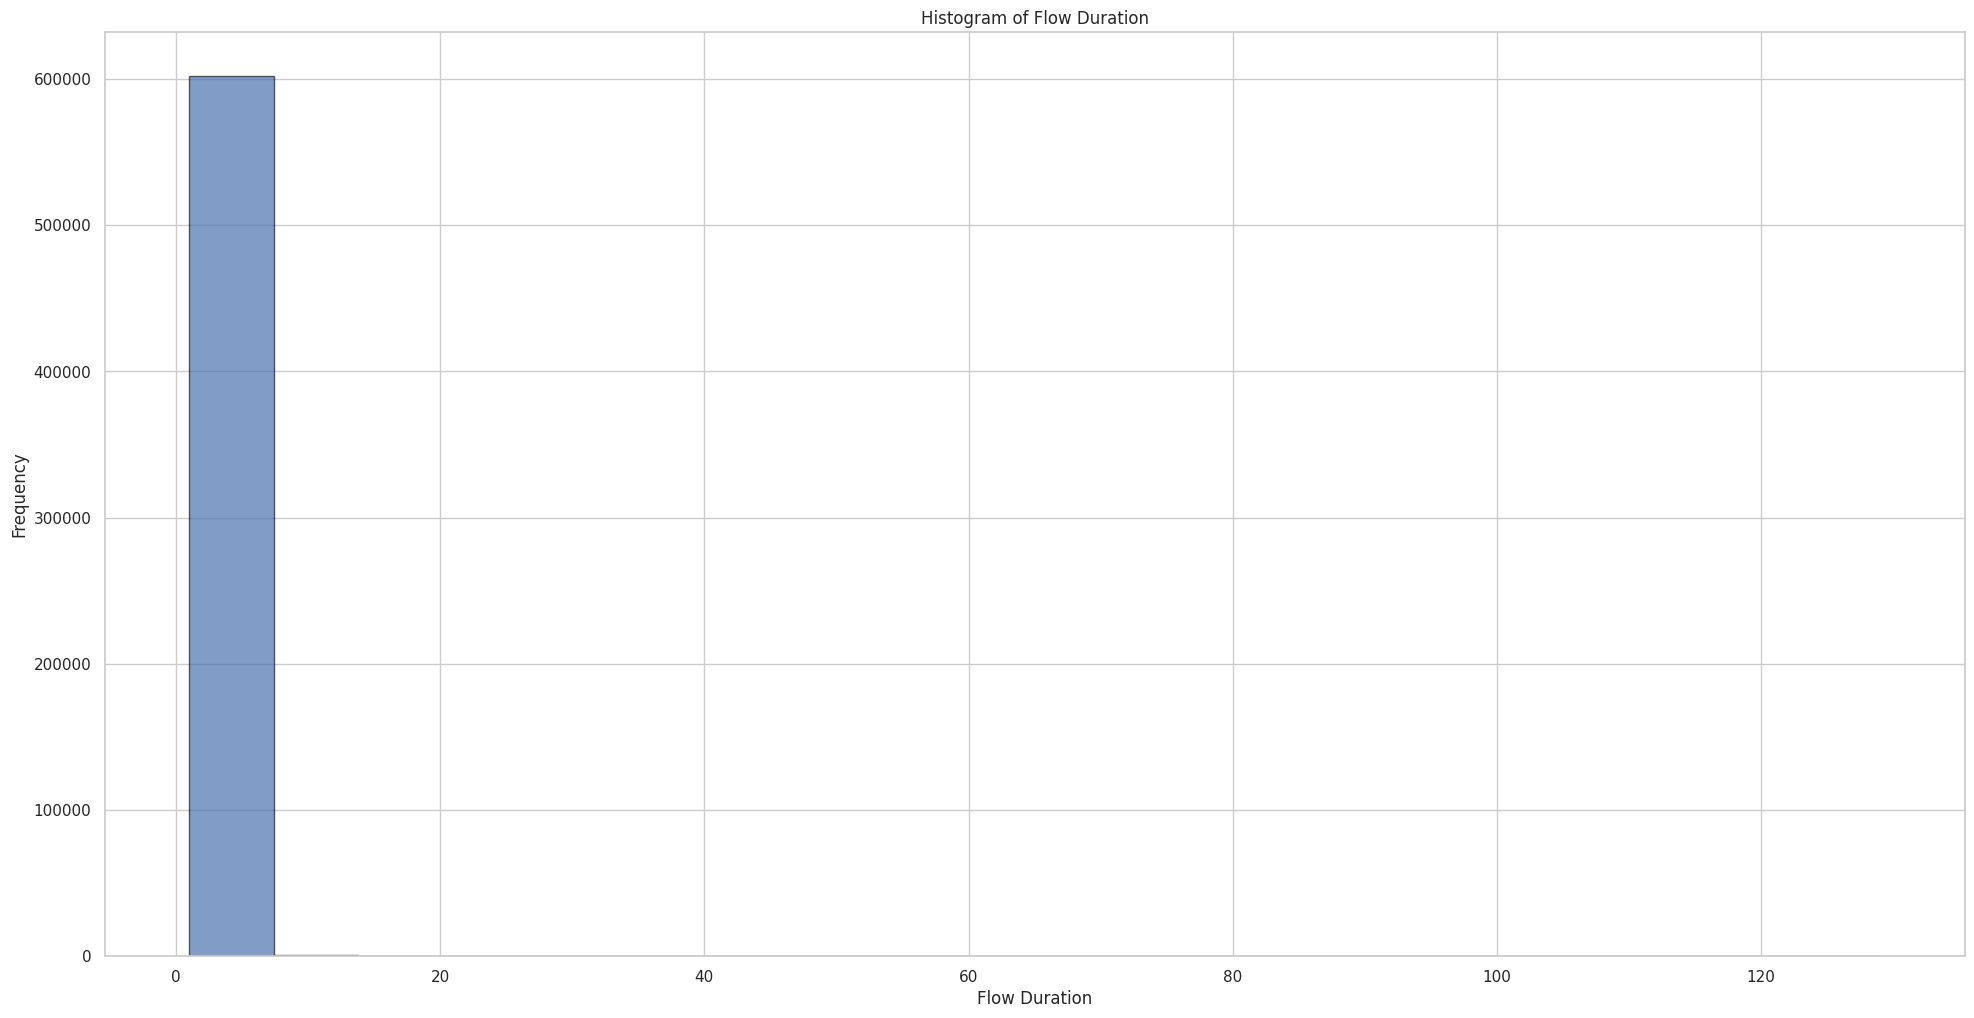

In [ ]:
plt.figure(figsize=(24,12))
plt.hist(df_cnt_h, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Flow Duration')
plt.show()

In [ ]:
df_cnt_h=df_cleaned['Source.Port'].value_counts()
df_cnt_h

443      33970
3128     26121
80        2088
49743      103
49548      101
         ...  
22963        1
22952        1
22955        1
22953        1
4977         1
Name: Source.Port, Length: 38722, dtype: int64

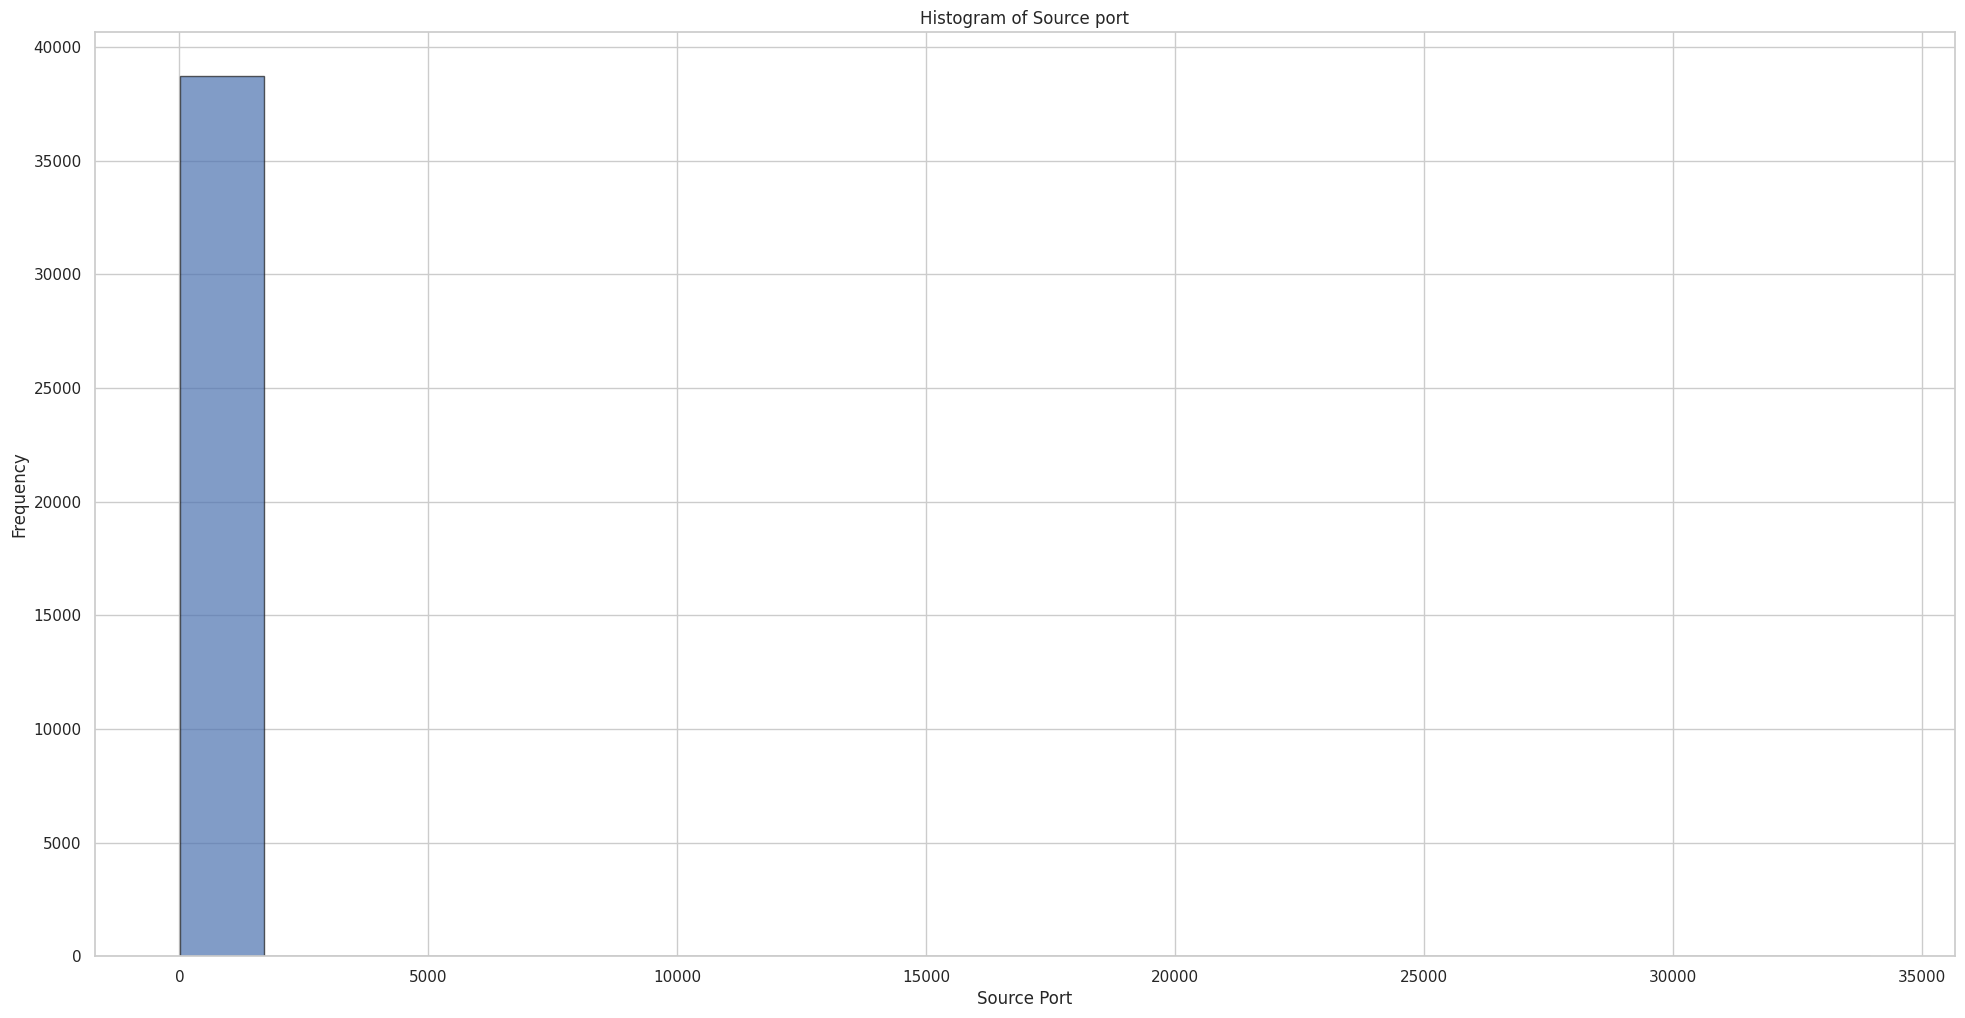

In [ ]:
plt.figure(figsize=(24,12))
plt.hist(df_cnt_h, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Source Port')
plt.ylabel('Frequency')
plt.title('Histogram of Source port')
plt.show()

In [ ]:
df_cnt_h=df_cleaned['Destination.Port'].value_counts()
df_cnt_h

3128     332878
443      245053
80       103272
5228       3197
8089        695
          ...  
52369         1
55377         1
33995         1
54893         1
41802         1
Name: Destination.Port, Length: 18827, dtype: int64

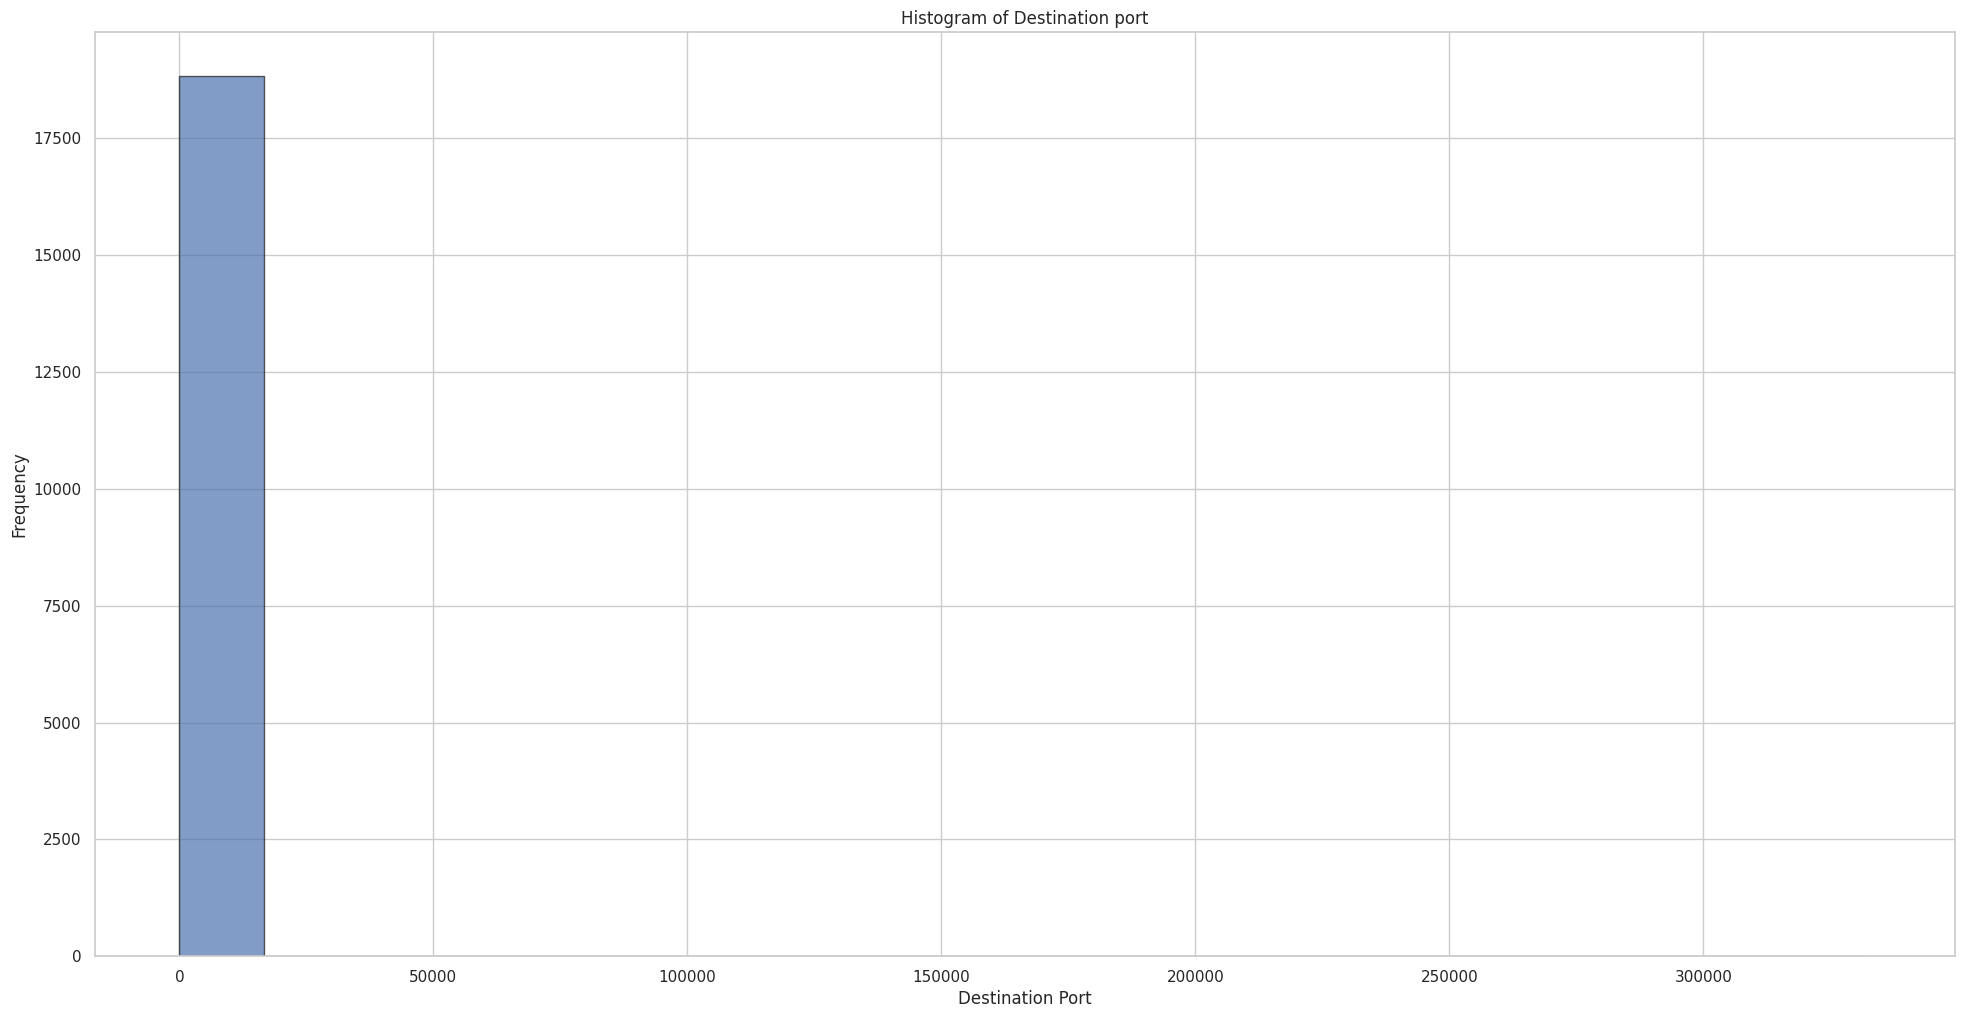

In [ ]:
plt.figure(figsize=(24,12))
plt.hist(df_cnt_h, bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Destination Port')
plt.ylabel('Frequency')
plt.title('Histogram of Destination port')
plt.show()

###Scatterplot

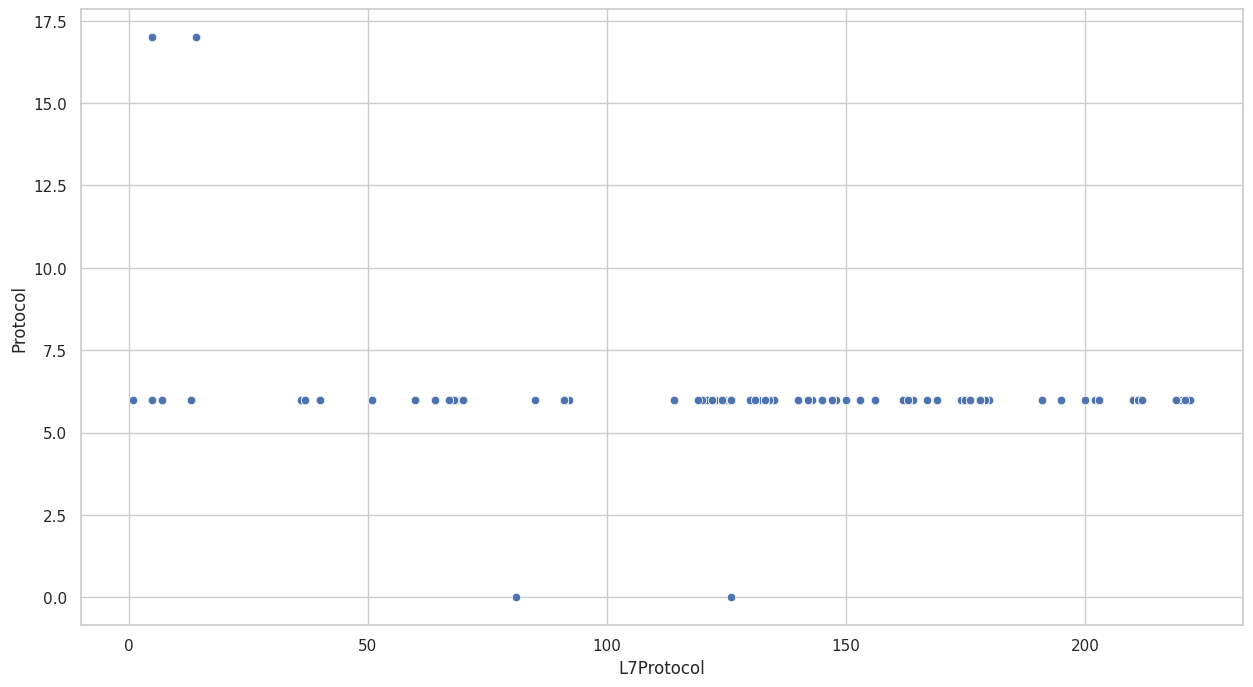

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df_cleaned["L7Protocol"], y=df_cleaned["Protocol"], sizes=(20, 200), legend="full")

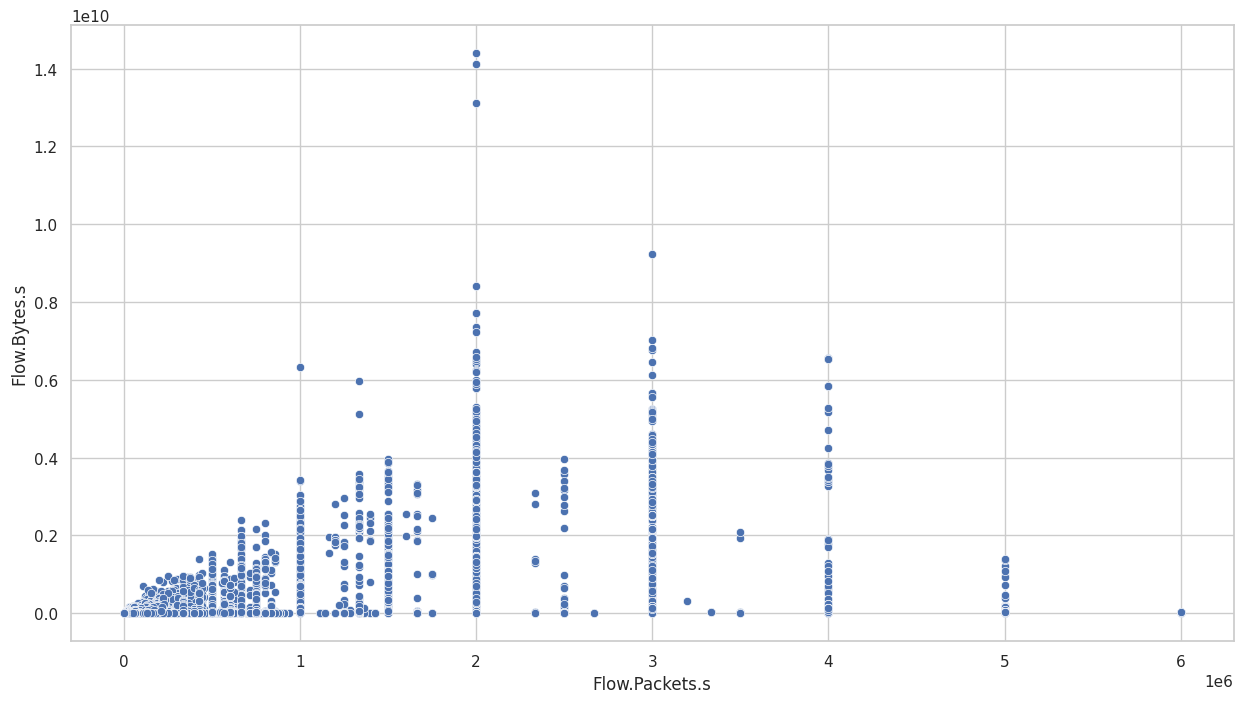

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x=df["Flow.Packets.s"], y=df["Flow.Bytes.s"], sizes=(20, 200), legend="full")

In [ ]:
df_cleaned['Timestamp1'] = pd.to_datetime(df_cleaned['Timestamp'], format='%d/%m/%Y%H:%M:%S')
df_cleaned['Hour'] = df_cleaned['Timestamp1'].dt.hour + df_cleaned['Timestamp1'].dt.minute / 60 + df_cleaned['Timestamp1'].dt.second / 3600

In [ ]:
df_cleaned['Hour']

27         11.188056
34         11.188056
35         11.188056
36         11.188056
40         11.188056
             ...    
3577281     5.660556
3577282     5.614167
3577283     5.664444
3577286     5.677500
3577289     5.718056
Name: Hour, Length: 748865, dtype: float64

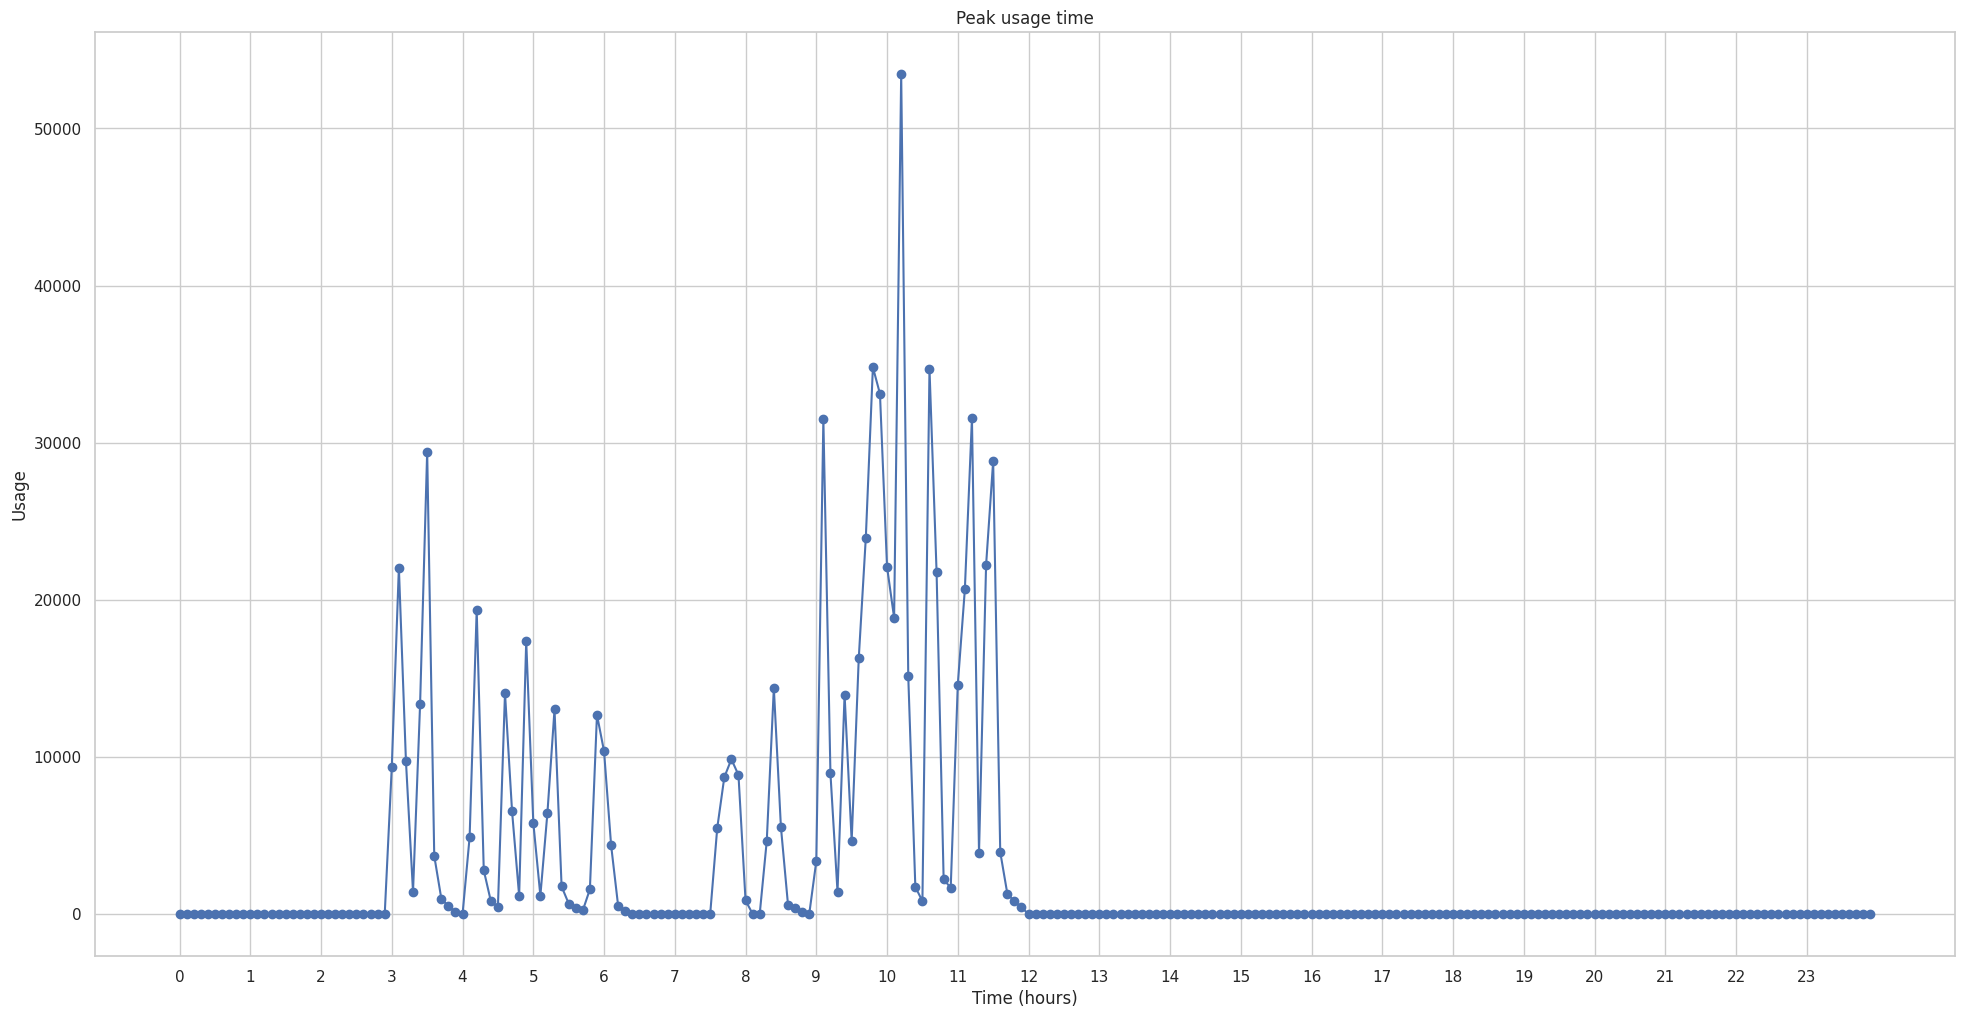

In [ ]:
# Create an array representing the 24-hour timeline
timeline = np.arange(0, 24, 0.1)

# Calculate busyness for each time point on the timeline
busyness = []
for hour in timeline:
    active_uses = ((df_cleaned['Hour'] <= hour+0.1) & (df_cleaned['Hour'] >= hour)).sum()
    busyness.append(active_uses)

plt.figure(figsize=(24, 12))
plt.plot(timeline, busyness, marker='o', linestyle='-', color='b')
plt.xlabel('Time (hours)')
plt.ylabel('Usage')
plt.title('Peak usage time')
plt.grid(True)
plt.xticks(np.arange(0, 24, 1))
plt.show()

###Correltion

<ipython-input-36-fd63b8ff5be5>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=new_df.corr(), lw = 1,annot=True)


<Axes: >

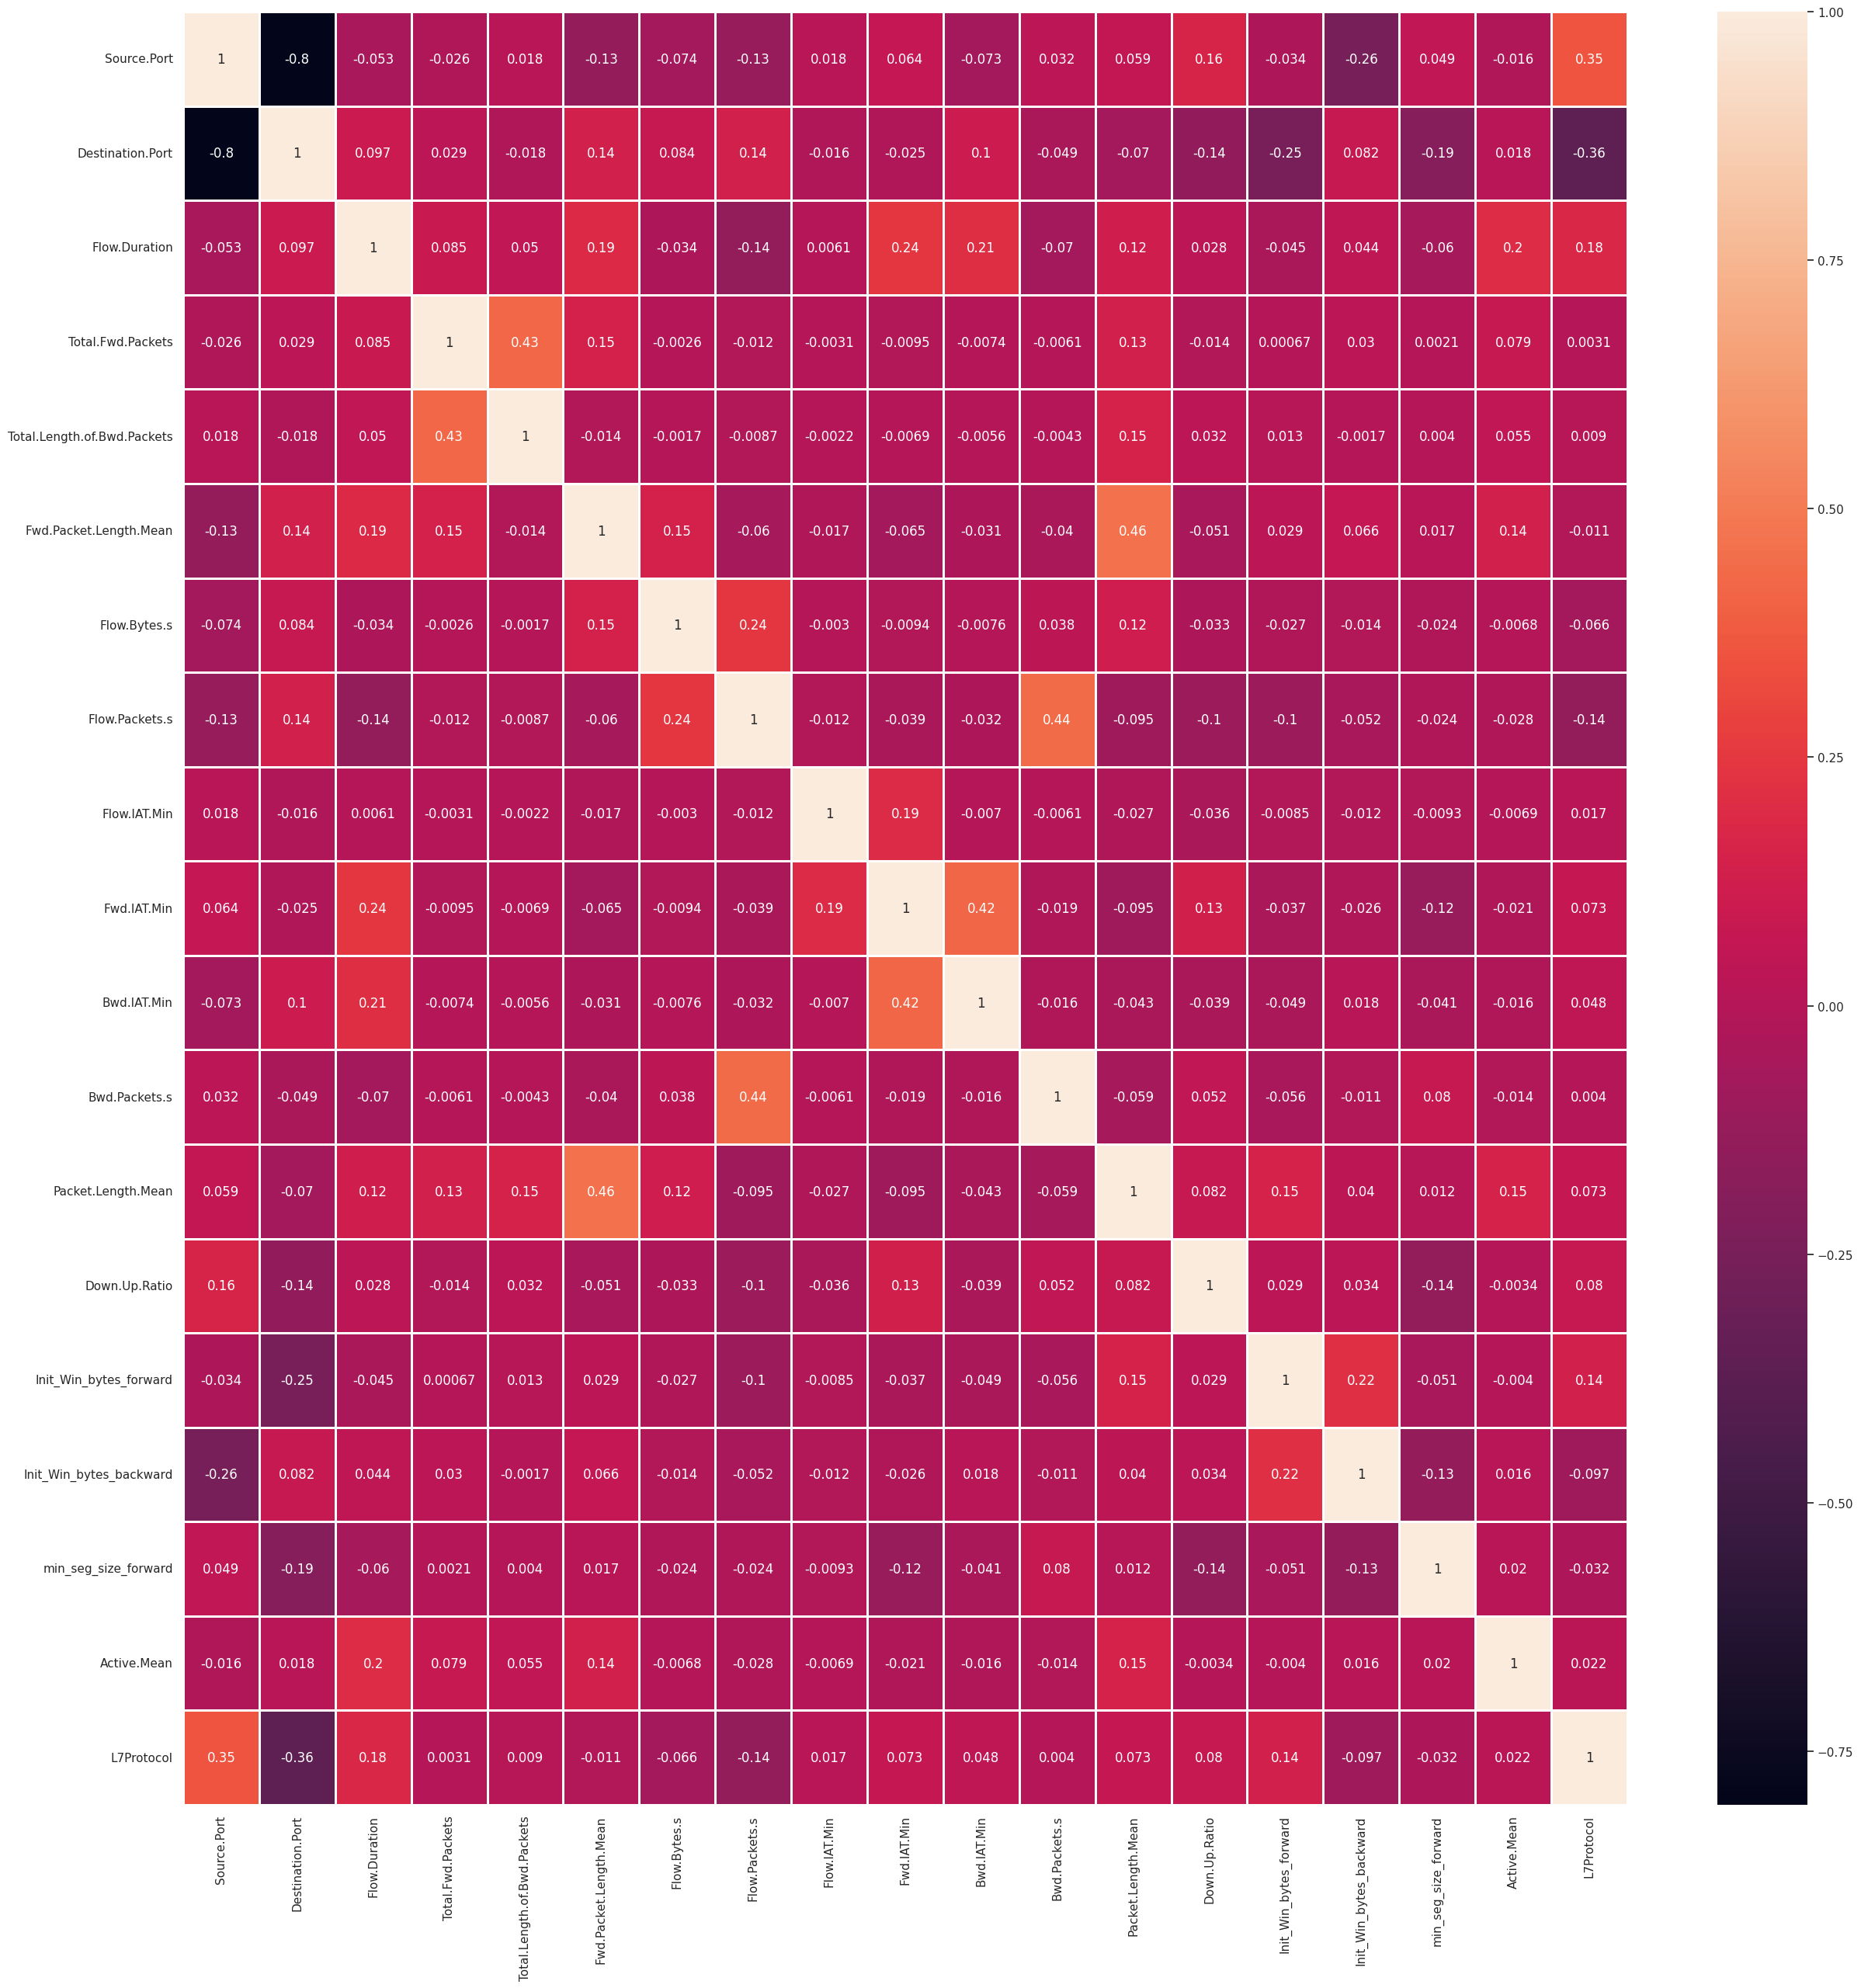

In [ ]:
new_df = df[['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Mean', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Min', 'Fwd.IAT.Min', 'Bwd.IAT.Min', 'Bwd.Packets.s', 'Packet.Length.Mean', 'Down.Up.Ratio',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active.Mean', 'L7Protocol', 'ProtocolName'
       ]]
plt.figure(figsize=(30,30))
sns.heatmap(data=new_df.corr(), lw = 1,annot=True)